# Homework 3: Data Wrangling and Exploratory Data Analysis

Ta-Feng is a retail warehouse in Taiwan that mainly sells food-products though it stocks some office and home products.  Like Costco and Sam's Club, it operates on a club structure wherein people buy a membership to gain access to the store.  As a result, purchases can be traced to specific customers.  In this homework, we will use this database to practice data wrangling, exploratory data analysis, and visualization.

Throughout the assignment, make sure that each plot has meaningful labels that characterize the variable represented and its units.

# Setup

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy, Datascience, pandas modules.
import numpy as np
import pandas as pd
import seaborn as sns

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
!pip install -U okpy
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')

Requirement already up-to-date: okpy in /Users/juntan/anaconda3/envs/datascience/lib/python3.5/site-packages
Requirement already up-to-date: requests==2.12.4 in /Users/juntan/anaconda3/envs/datascience/lib/python3.5/site-packages (from okpy)
Assignment: Homework 3
OK, version v1.10.1



# Importing Data

In this section, we run through some problems that you might face as you go through the innocuous-sounding process of "importing data."  We also have you process some variables that aren't in the most user-friendly form.

### Age Classes
We'll start by looking at `age_classes.txt`, which is a lookup table for our main Ta Feng table.

In [2]:
!head "age_classes.txt"

A 0-25
B 25-29
C 30-34
D 35-39
E 40-44
F 45-49
G 50-54
H 55-59
I 60-64
J 65-120

#### Question 1
What is the delimiter used in this file?

*spaces*

Let's read in `age_classes.txt` as a data frame called `age_classes`.  Use the column names provided below.

In [3]:
age_class_columns = ['code', 'age_range']
age_classes = pd.read_csv('age_classes.txt', sep=" ", 
                          header=None, names=age_class_columns)
age_classes

,code,age_range
0,A,0-25
1,B,25-29
2,C,30-34
3,D,35-39
4,E,40-44
5,F,45-49
6,G,50-54
7,H,55-59
8,I,60-64
9,J,65-120


#### Question 2
What type of variable is `age_range`? Continuous, discrete, nominal, ordinal or other?  Make sure the type of `age_range` in the data frame `age_classes` matches your answer.

*category*

In [4]:
age_classes["age_range"] = age_classes["age_range"].astype('category')
age_classes.dtypes

code           object
age_range    category
dtype: object

In [5]:
_ = ok.grade('q02')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: jtan0325@berkeley.edu
Successfully logged in as jtan0325@berkeley.edu
Backup... 100% complete
Backup successful for user: jtan0325@berkeley.edu
URL: https://okpy.org/cal/data100/sp17/hw3/backups/NkkZAD
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 3

Perhaps at some point we would like to work with the age data numerically.  Derive two numerical columns from `age_range` called `age_min` and `age_max`, which contain the left and right endpoints of `age_range`, respectively.

In [6]:
age_classes["age_min"] = pd.Series([int(s.split("-")[0]) for s in age_classes["age_range"].astype('str')])
age_classes["age_max"] = pd.Series([int(s.split("-")[1]) for s in age_classes["age_range"].astype('str')])

In [7]:
age_classes

,code,age_range,age_min,age_max
0,A,0-25,0,25
1,B,25-29,25,29
2,C,30-34,30,34
3,D,35-39,35,39
4,E,40-44,40,44
5,F,45-49,45,49
6,G,50-54,50,54
7,H,55-59,55,59
8,I,60-64,60,64
9,J,65-120,65,120


In [8]:
_ = ok.grade('q03')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: jtan0325@berkeley.edu
URL: https://okpy.org/cal/data100/sp17/hw3/backups/OYY1BY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4
To have a single column representing age, we could reduce the two endpoints to a single number.  Compute an additional `age_center` attribute that is equal to the midpoint of `age_range`.

In [9]:
age_classes["age_center"] = (age_classes["age_min"] + age_classes["age_max"])/2
age_classes

,code,age_range,age_min,age_max,age_center
0,A,0-25,0,25,12.5
1,B,25-29,25,29,27.0
2,C,30-34,30,34,32.0
3,D,35-39,35,39,37.0
4,E,40-44,40,44,42.0
5,F,45-49,45,49,47.0
6,G,50-54,50,54,52.0
7,H,55-59,55,59,57.0
8,I,60-64,60,64,62.0
9,J,65-120,65,120,92.5


In [10]:
_ = ok.grade('q04')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: jtan0325@berkeley.edu
URL: https://okpy.org/cal/data100/sp17/hw3/backups/PNN2D1
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Residence Area

Now inspect `residence_area.txt` in your terminal window.  We'll read in the data in the next cell.

In [11]:
!head "residence_area.txt"

A: 105
B: 106
C: 110
D: 114
E: 115
F: 221
G: others
H: unknown


In [12]:
# If you use a single character delimiter, it uses the faster engine ... 
residence_areas = pd.read_csv('residence_area.txt', 
                              delimiter=':',
                              header=None, 
                              names=['code','area'])
# Need to remove the leading whitespace
residence_areas['area'] = residence_areas['area'].str.strip()

#### Question 5
The `README.TXT` file contains more information about the postal codes that is not immediately obvious if you just look at `residence area.txt`.  Now that we have information that adds context to our data, we might want to add it to the lookup table.  Create a new column `dist_rank` that encodes the information as ranks.  Code missing values as `np.nan`.

In [13]:
residence_areas

,code,area
0,A,105
1,B,106
2,C,110
3,D,114
4,E,115
5,F,221
6,G,others
7,H,unknown


In [14]:
# from the closest: 115,221,114,105,106,110
residence_areas["dist_rank"] = pd.Series([4, 5, 6, 3, 1, 2, np.nan, np.nan])

In [15]:
_ = ok.grade('q05')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: jtan0325@berkeley.edu
URL: https://okpy.org/cal/data100/sp17/hw3/backups/QWW3E0
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Run this cell: Reading in `Ta Feng`
The cell below reads in the Ta Feng data and concatenates the four months into a single data frame.  `gzip` deals with the fact that the files are compressed (hence the `gz` at the ends of their names).  `Big5` refers to a character encoding for Chinese characters.

In [16]:
data_column_names = [
    'transaction_time',
    'customer_id',
    'age_class', 
    'residence_area', 
    'product_subclass', 
    'product_id', 
    'amount', 
    'asset', 
    'sales_price'
]

files = [
    'D01.gz',
    'D02.gz',
    'D11.gz',
    'D12.gz'
]

frames = []

for f in files:
    df = pd.read_csv(f, compression='gzip', encoding='Big5', delimiter=';', 
                     skipinitialspace=True, header=0, names=data_column_names)
    frames.append(df)

taFeng = pd.concat(frames)

# These two columns have hard-to-detect whitespace that cause issues
taFeng['age_class'] = taFeng['age_class'].str.strip()
taFeng['residence_area'] = taFeng['residence_area'].str.strip()
taFeng.head()

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price
0,2001-01-01 00:00:00,141833,F,F,130207,4710105011011,2,44,52
1,2001-01-01 00:00:00,1376753,E,E,110217,4710265849066,1,150,129
2,2001-01-01 00:00:00,1603071,E,G,100201,4712019100607,1,35,39
3,2001-01-01 00:00:00,1738667,E,F,530105,4710168702901,1,94,119
4,2001-01-01 00:00:00,2141497,A,B,320407,4710431339148,1,100,159


#### Run this cell: Joining the tables
The code below combines the data in the `taFeng` table with the information found in the lookup tables `age_classes` and `residence_areas`.

In [17]:
taFengFull = pd.merge(taFeng, age_classes,
                      how='left', left_on='age_class', right_on='code')
taFengFull = pd.merge(taFengFull, residence_areas, suffixes=['_age', '_residence'], 
                      how='left', left_on = 'residence_area', right_on = 'code')

In [18]:
taFengFull.head()

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price,code_age,age_range,age_min,age_max,age_center,code_residence,area,dist_rank
0,2001-01-01 00:00:00,141833,F,F,130207,4710105011011,2,44,52,F,45-49,45.0,49.0,47.0,F,221,2.0
1,2001-01-01 00:00:00,1376753,E,E,110217,4710265849066,1,150,129,E,40-44,40.0,44.0,42.0,E,115,1.0
2,2001-01-01 00:00:00,1603071,E,G,100201,4712019100607,1,35,39,E,40-44,40.0,44.0,42.0,G,others,NaN
3,2001-01-01 00:00:00,1738667,E,F,530105,4710168702901,1,94,119,E,40-44,40.0,44.0,42.0,F,221,2.0
4,2001-01-01 00:00:00,2141497,A,B,320407,4710431339148,1,100,159,A,0-25,0.0,25.0,12.5,B,106,5.0


#### Question 6
Since we performed a left join and the `code` columns were keys in both `age classes.txt` and `residence areas.txt` were keys, we expect that the number of rows in `taFengFull` to be the same as in `taFeng`.  Write function a `have_same_nrows` that takes two data frames as its arguments and returns `True` if they have the same number of rows.

In [19]:
def have_same_nrows(df1, df2):
    return len(df1.index) == len(df2.index)

In [20]:
same_after_join = have_same_nrows(taFeng, taFengFull)
same_after_join

True

In [21]:
_ = ok.grade('q06')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: jtan0325@berkeley.edu
URL: https://okpy.org/cal/data100/sp17/hw3/backups/R664GO
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 7
It's a good habit to keep track of missing values.  Notice that `K` appears in the column `age_class`, but not in the age lookup table `age_classes`.  What happened when we joined the two tables?  i.e. Do the corresponding rows appear in our `taFengFull` table, and if so, how does the join deal with the fact that `K` doesn't exist in the lookup table?

In [22]:
taFengFull[taFengFull.age_class =='K'].head()

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price,code_age,age_range,age_min,age_max,age_center,code_residence,area,dist_rank
23,2001-01-10 00:00:00,960434,K,E,100205,4710247006944,2,144,170,NaN,NaN,NaN,NaN,NaN,E,115,1.0
67,2001-01-15 00:00:00,992725,K,H,110102,4710311107102,1,20,28,NaN,NaN,NaN,NaN,NaN,H,unknown,NaN
73,2001-01-15 00:00:00,1411492,K,H,110103,4712031000060,1,57,69,NaN,NaN,NaN,NaN,NaN,H,unknown,NaN
105,2001-01-15 00:00:00,1846706,K,H,120105,4710857000066,1,40,46,NaN,NaN,NaN,NaN,NaN,H,unknown,NaN
162,2001-01-15 00:00:00,2141572,K,H,120103,4710583510068,1,29,34,NaN,NaN,NaN,NaN,NaN,H,unknown,NaN


In [23]:
taFengFull[taFengFull.customer_id == 1069]

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price,code_age,age_range,age_min,age_max,age_center,code_residence,area,dist_rank
133216,2001-01-21 00:00:00,1069,K,E,110333,4710320224661,1,361,425,NaN,NaN,NaN,NaN,NaN,E,115,1.0
133335,2001-01-21 00:00:00,1069,K,E,100311,4710022101208,1,197,198,NaN,NaN,NaN,NaN,NaN,E,115,1.0
133447,2001-01-21 00:00:00,1069,K,E,110333,4712603661644,1,313,348,NaN,NaN,NaN,NaN,NaN,E,115,1.0
239912,2001-02-10 00:00:00,1069,K,E,110217,4712162000038,2,300,290,NaN,NaN,NaN,NaN,NaN,E,115,1.0
292495,2001-02-03 00:00:00,1069,K,E,100101,22000167620,2,216,192,NaN,NaN,NaN,NaN,NaN,E,115,1.0
292636,2001-02-03 00:00:00,1069,K,E,120106,4710011402026,2,44,46,NaN,NaN,NaN,NaN,NaN,E,115,1.0
293266,2001-02-03 00:00:00,1069,K,E,110117,4903101125107,2,108,58,NaN,NaN,NaN,NaN,NaN,E,115,1.0
293425,2001-02-03 00:00:00,1069,K,E,110108,4710088620156,2,154,130,NaN,NaN,NaN,NaN,NaN,E,115,1.0
293735,2001-02-03 00:00:00,1069,K,E,100314,4710176008699,1,78,70,NaN,NaN,NaN,NaN,NaN,E,115,1.0
512026,2000-11-13 00:00:00,1069,K,E,100314,4710176008699,1,78,98,NaN,NaN,NaN,NaN,NaN,E,115,1.0


*In that case, the rest of the age attributes are mapped to Nan*

# Guided EDA

As a business analyst, we may be interested in what the purchase data can tell us about TaFeng's business and the behavior of their customers. While there are many aspects of this data set that we could look into, we will only focus on two ideas in the interest of keeping this assignment reasonable.  The questions will guide you through the iterative process of data exploration---where one question flows into another.

* Does the relationship between basket size and amount spent match our intuition?
* Are there temporal trends in customer behavior?

We start by exploring customer behavior at the product level to get a feel for the variables, data type, cleanliness, missingness, and distributions.  For the moment, assume that the data consists of all transactions in the four month period (i.e. no transactions are missing from this data set).

### Note
For each visualizations we display, please faithfully reproduce that plot to the best of your ability.  They represent our expections of exemplar work.  

#### Question 8
Calculate the number of shopping trips each customer made in the four-month period. Then make a histogram that summarizes the information. Assume that transactions occurring on the same day can be grouped together into one trip (e.g. All purchases on January 1 by the same customer should be lumped together). Hint: You will have to use a `groupby` to change the granularity of the data to the level of customers.

![](repeat_business.png)

In [24]:
faFengFull_id_date_only = taFengFull.loc[:, ['customer_id', "transaction_time"]]
rpt_business = faFengFull_id_date_only.groupby(['customer_id', "transaction_time"]).size().reset_index()\
               .groupby("customer_id").size().reset_index()[0]# Array of transaction counts
rpt_business.head()

0    4
1    4
2    2
3    1
4    3
Name: 0, dtype: int64

(0, 90)

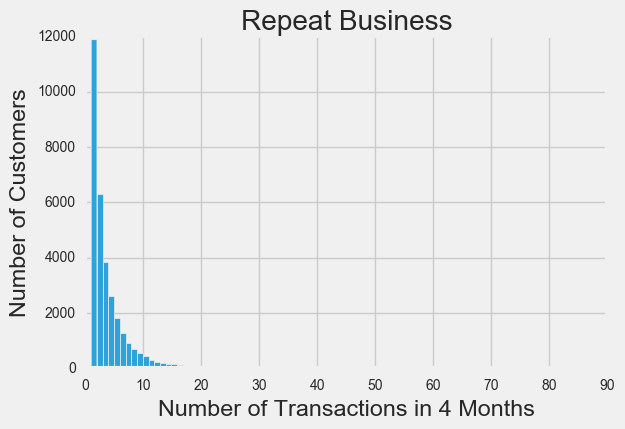

In [25]:
rpt_business.hist(bins=rpt_business.max())
plt.xlabel('Number of Transactions in 4 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')
plt.xlim(0, 90)

#### Question 9

A customer that is on the left side of the distribution shops only sporadically at Ta Feng, and a customer on the right side of the distribution shops at Ta Feng very frequently. The distribution is skewed right with nearly all the customers shopping fewer than 20 times in the four month period.  Let's zoom in on the x-axis to better view the shape of the distribution of the bulk of the customers. To do this, remake the above plot as above, but set the limits of the x-axis to 0 and 20 to zoom in on the range where we find most of the customers.


(0, 30)

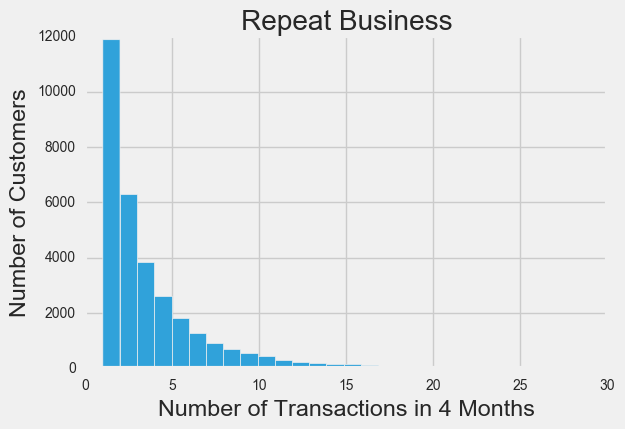

In [26]:
rpt_business.hist(bins=rpt_business.max())
plt.xlabel('Number of Transactions in 4 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')
plt.xlim(0, 30)

(0, 20)

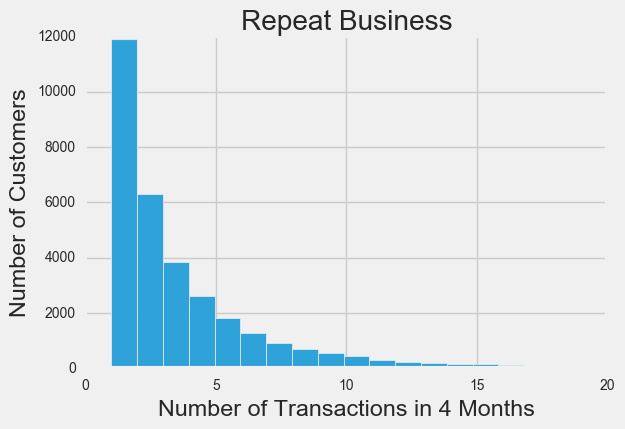

In [27]:
rpt_business.hist(bins=rpt_business.max())
plt.xlabel('Number of Transactions in 4 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')
plt.xlim(0, 20)

#### Question 10
We have successfully filled the plotting region with our histogram, and we can more easily see how rapidly the number of shopping trips trails off.  We wonder just how much of our data is concentrated on the left side.  Use the `quantile` method to calculate the deciles (i.e., the 0th, 10th, 20th, ..., 90th, and 100th percentiles) of `rpt_business`.

In [28]:
rpt_deciles = rpt_business.quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
rpt_deciles

0.0     1.0
0.1     1.0
0.2     1.0
0.3     1.0
0.4     2.0
0.5     2.0
0.6     3.0
0.7     4.0
0.8     5.0
0.9     8.0
1.0    86.0
Name: 0, dtype: float64

#### Question 11

The percentiles tell us that 90% of customers shopped at Ta Feng 8 times or fewer in the four months spanning our data set and more than half went only 1 or 2 times! Perhaps we can bring in the large values and stretch the small values with a log transform.  Remake the histogram as before, except this time, rescale the x-axis with a log transformation. Hint: To make the tick marks appear, you may want to look into pyplot's `tick_params`.

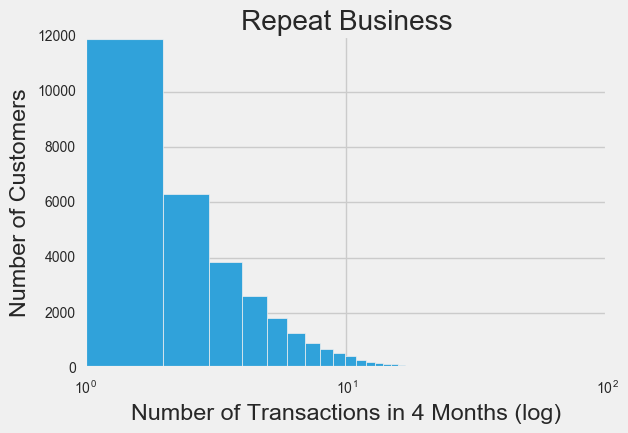

In [29]:
rpt_business.hist(bins=rpt_business.max())
plt.xscale('log')
plt.xlabel('Number of Transactions in 4 Months (log)')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')
plt.tick_params(axis = "both")

In this case, the log transformation does not help symmetrize the distribution. Since the vast bulk of the data take on only 8 distinct values with over half the data being either a 1 or a 2, the log transformation has little impact.

# Taking the data to another level

Next, we investigate the shopping trips in greater detail.  For example, we might be interested in the total number of items purchased, the total amount spent, and the number of unique products purchased on the trip.  Since our data are at the level of items purchased, we need to aggregate our data to the shopping cart. Fortunately we have tools to do this; that is, we will change the granularity. For each shopping cart, we find:  

* `num_items` - the total number of items purchased
* `total` - the total value of the cart
* `num_unique` - the number of unique products purchased

#### Question 12

Create a data frame called `carts` that contains the variables above, as well as `customer_id` and `transaction_time`.  Make sure you use the names specified.

In [30]:
print(taFengFull.head())
print(list(taFengFull))

      transaction_time  customer_id age_class residence_area  \
0  2001-01-01 00:00:00       141833         F              F   
1  2001-01-01 00:00:00      1376753         E              E   
2  2001-01-01 00:00:00      1603071         E              G   
3  2001-01-01 00:00:00      1738667         E              F   
4  2001-01-01 00:00:00      2141497         A              B   

   product_subclass     product_id  amount  asset  sales_price code_age  \
0            130207  4710105011011       2     44           52        F   
1            110217  4710265849066       1    150          129        E   
2            100201  4712019100607       1     35           39        E   
3            530105  4710168702901       1     94          119        E   
4            320407  4710431339148       1    100          159        A   

  age_range  age_min  age_max  age_center code_residence    area  dist_rank  
0     45-49     45.0     49.0        47.0              F     221        2.0  
1     40

In [31]:
# num_items - the total number of items purchased
# total - the total value of the cart
aggregate = taFengFull.groupby(['customer_id', "transaction_time"]).sum().reset_index()
aggregae_df = pd.DataFrame({
    'customer_id': aggregate['customer_id'],
    'transaction_time': aggregate['transaction_time'],
    'num_items': aggregate['amount'],
    'total': aggregate['sales_price']
})
aggregae_df.head()      

,customer_id,num_items,total,transaction_time
0,1069,2,187,2000-11-13 00:00:00
1,1069,3,971,2001-01-21 00:00:00
2,1069,9,496,2001-02-03 00:00:00
3,1069,2,290,2001-02-10 00:00:00
4,1113,5,420,2000-11-12 00:00:00


In [32]:
unique_num_items = taFengFull.groupby(['customer_id', "transaction_time", "product_id"]).size().reset_index()\
                   .groupby(['customer_id', "transaction_time"]).size().reset_index()
unique_num_items.columns = ['customer_id', 'transaction_time', 'num_unique']
unique_num_items.head()

,customer_id,transaction_time,num_unique
0,1069,2000-11-13 00:00:00,2
1,1069,2001-01-21 00:00:00,3
2,1069,2001-02-03 00:00:00,5
3,1069,2001-02-10 00:00:00,1
4,1113,2000-11-12 00:00:00,2


In [33]:
carts = pd.merge(unique_num_items, aggregae_df,
                 how='left', left_on=['customer_id', 'transaction_time'], right_on=['customer_id', 'transaction_time'])
carts.head()

,customer_id,transaction_time,num_unique,num_items,total
0,1069,2000-11-13 00:00:00,2,2,187
1,1069,2001-01-21 00:00:00,3,3,971
2,1069,2001-02-03 00:00:00,5,9,496
3,1069,2001-02-10 00:00:00,1,2,290
4,1113,2000-11-12 00:00:00,2,5,420


#### Question 13
Let's take a look at the relationship between the number of items in a cart and the cart total.  Intuitively the two should be positively correlated, but why assume when we can verify?  Make a scatter plot that will help us inspect the relationship between these two variables. 

![](quantity_vs_value_raw.png)

(-50000, 500000)

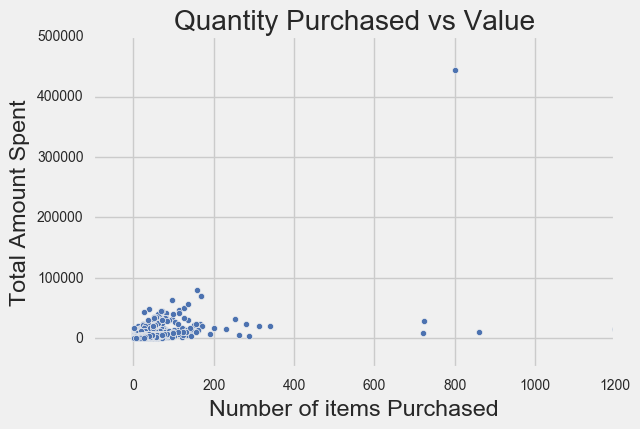

In [34]:
carts.plot(x = 'num_items', y = 'total', kind = 'scatter')
plt.xlabel('Number of items Purchased')
plt.ylabel('Total Amount Spent')
plt.title('Quantity Purchased vs Value')
plt.xlim(-100, 1200)
plt.ylim(-50000, 500000)

#### Question 14

We might expect from the distribution of the number of trips that there would be a few very large values for the number of items and the total amount spent.  Indeed, a handful of observations make it difficult to see the shape of the bulk of the data.  As before take a log transformation of these two variables. Make another scatter plot, but this time, log-transform both the x and y axes.

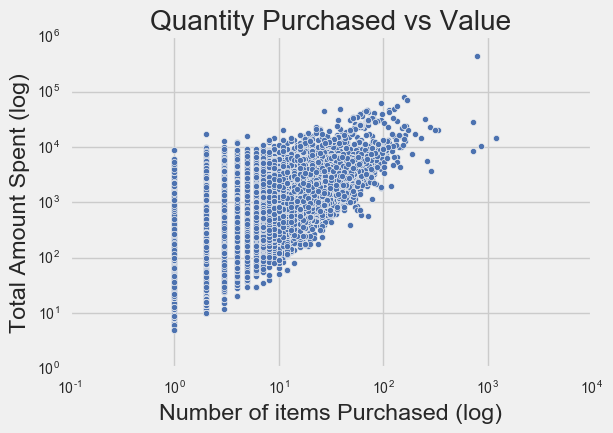

In [35]:
carts.plot(x = 'num_items', y = 'total', kind = 'scatter')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of items Purchased (log)')
plt.ylabel('Total Amount Spent (log)')
plt.title('Quantity Purchased vs Value')
#plt.xlim(-100, 1200)
#plt.ylim(-50000, 500000)

#### Question 15

Notice the vertical bands in the scatter plot. These are from the discreteness of the number of items purchased.  We are better able to see these bands with the log transformed data.

While there seems to be a positive correlation in the point cloud, the over plotting makes be deceiving us. We will make a few changes to the scatter plot to attempt to address the problem. First, we adjust the opacity of the plotting symbols by changing alpha values for the scatter plot portion of the plot. We also shrink the size of the plotting symbol to reduce the amount of over plotting.  Additionally, we add a line-of-best-fit through the data. Hint: Use seaborn's `lmplot` to simultaneously plot the points and the line-of-best-fit.


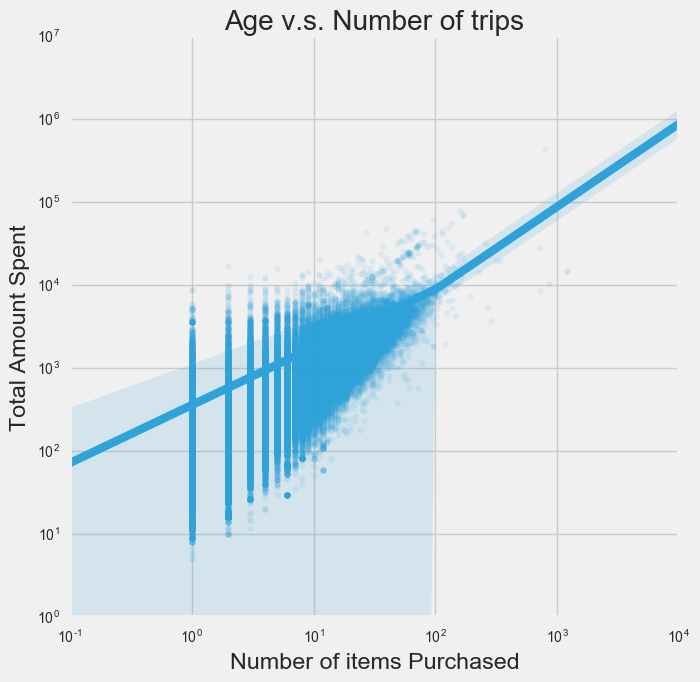

In [36]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log", xlabel='Number of items Purchased', 
       ylabel='Total Amount Spent', title='Age v.s. Number of trips')
g = sns.regplot(x = 'num_items', y = 'total', data=carts, ax=ax, scatter_kws={"alpha": 0.1})
g.set(xlabel='Number of items Purchased', ylabel='Total Amount Spent', title='Age v.s. Number of trips')

From this scatter plot, we can make several observations about the relationship between the number of items purchased and the total amount spent. It appears that there is a linear association between the amount spent and number of items purchased on a log-log scale.  (A log-log scale implies that, say, a 10% increase in the number of items purchased is associated with b*10% increase in the amount spent, on average).  We also note that the spread in amount spent varies with the number of items spent; in particular, the spread is greater for smaller shopping baskets.  This might be due to shopping trips where one expensive item is purchased. 

# Time

In this question, we will investigate temporal trends in shopping behavior.  We begin with the technical details of date-time data.

#### Run this cell: Parsing Time
Currently, your computer understands the transaction times as strings.  The code below typecasts the transaction time column to the `datetime64`.

In [37]:
time_format = "%Y-%m-%d %H:%M:%S"
taFengFull['transaction_time'] = pd.to_datetime(taFengFull['transaction_time'], 
                                                format = time_format)

#### Question 16
Now that we have the time data in a usable format, we can start looking into customer trends over time.  Make a line plot of the number of unique customers per day against day.  Note that we have once again changed the granularity at which we are examining our data.

![](unique_per_day.png)

In [38]:
date_unique_cnt_df = taFengFull.groupby(['transaction_time', "customer_id"]).size().reset_index()\
                     .groupby(['transaction_time']).size().reset_index()
date_unique_cnt_df.columns = ['transaction_time', 'count']
date_unique_cnt_df.head()

,transaction_time,count
0,2000-11-01,193
1,2000-11-02,1029
2,2000-11-03,1089
3,2000-11-04,1221
4,2000-11-05,1583


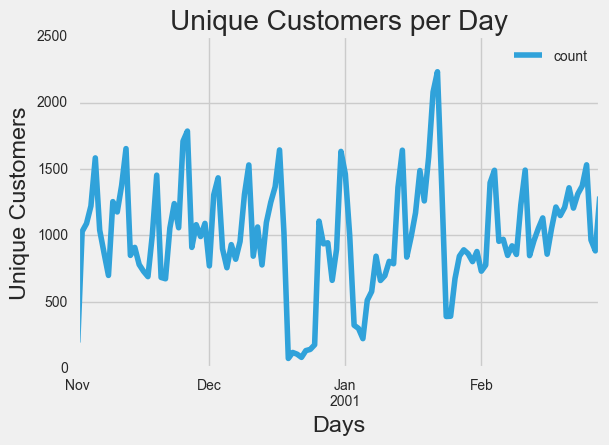

In [39]:
date_unique_cnt_df.plot.line(x="transaction_time", y="count")
plt.xlabel('Days')
plt.ylabel('Unique Customers')
plt.title('Unique Customers per Day')

#### Question 17

The data seems to exhibit some patterns.  It would seem plausible that people are more likely to shop on certain days of the week.  Make a box-and-whiskers plot that summarizes customer counts by day of the week.  Hint: For our solution, we created a new column called `day_of_week` that contains the name of, well, the day of the week.

![](number_by_dow.png)

In [40]:
# add a day_of_week column to the dataframe
taFengFull['day_of_week'] = taFengFull['transaction_time'].dt.weekday_name
taFengFull.head()

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price,code_age,age_range,age_min,age_max,age_center,code_residence,area,dist_rank,day_of_week
0,2001-01-01,141833,F,F,130207,4710105011011,2,44,52,F,45-49,45.0,49.0,47.0,F,221,2.0,Monday
1,2001-01-01,1376753,E,E,110217,4710265849066,1,150,129,E,40-44,40.0,44.0,42.0,E,115,1.0,Monday
2,2001-01-01,1603071,E,G,100201,4712019100607,1,35,39,E,40-44,40.0,44.0,42.0,G,others,NaN,Monday
3,2001-01-01,1738667,E,F,530105,4710168702901,1,94,119,E,40-44,40.0,44.0,42.0,F,221,2.0,Monday
4,2001-01-01,2141497,A,B,320407,4710431339148,1,100,159,A,0-25,0.0,25.0,12.5,B,106,5.0,Monday


In [41]:
day_unique_cnt_df = taFengFull.groupby(['transaction_time', "customer_id"]).size().reset_index()\
                     .groupby(['transaction_time']).size().reset_index()
day_unique_cnt_df.columns = ['transaction_time', 'count']
day_unique_cnt_df['day_of_week'] = day_unique_cnt_df['transaction_time'].dt.weekday_name
day_unique_cnt_df.head()

,transaction_time,count,day_of_week
0,2000-11-01,193,Wednesday
1,2000-11-02,1029,Thursday
2,2000-11-03,1089,Friday
3,2000-11-04,1221,Saturday
4,2000-11-05,1583,Sunday


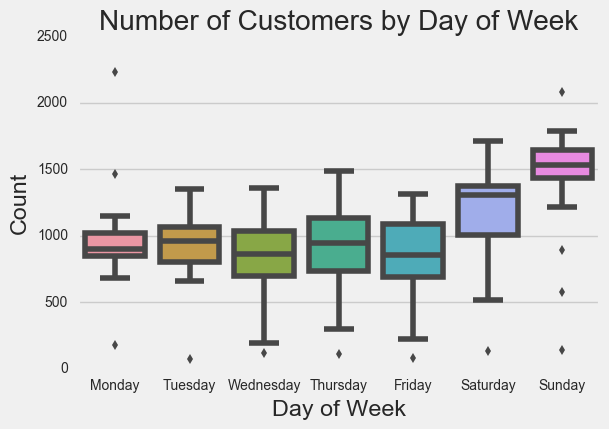

In [42]:
ax = sns.boxplot(x="day_of_week", y="count", data=day_unique_cnt_df,
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set(xlabel='Day of Week', ylabel='Count', title='Number of Customers by Day of Week')

The boxplots confirm that typical Sundays have many more (~500) customers shopping in comparison to the week days.  Also, many customers visit Ta Feng on Saturday.

#### Question 18
There seems to be three distinct times that the number of customers drops below "normal" counts.  Could these days be holidays?  Name three holidays that would most influence shopping behavior in this time period.  Hint: To answer this question, you will have to understand the temporal and geographical context of the data.

*1. Many people left the town. 2. People tends to stay at home in holidays. 3. The store doesn't open as the normal hours.*

#### Question 19

Reproduce the line graph from above, but this time, add reference lines so that you can easily pick out which days are holidays.

![](number_by_holiday.png)

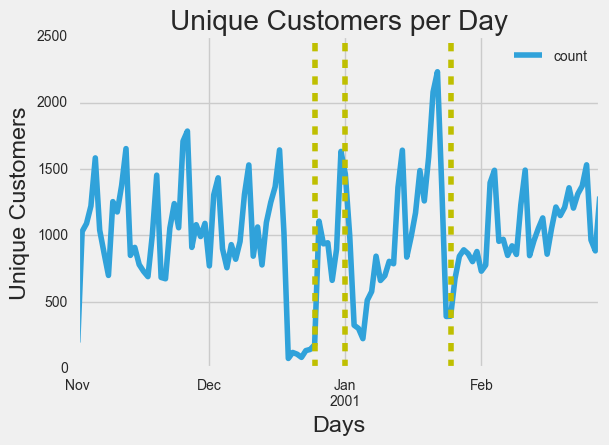

In [43]:
date_unique_cnt_df.plot.line(x="transaction_time", y="count")
xposition = [pd.to_datetime('2001-01-01'), pd.to_datetime('2000-12-25'), pd.to_datetime('2001-1-25')]
for xc in xposition:
    plt.axvline(xc, color='y', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Unique Customers')
plt.title('Unique Customers per Day')


It seems like holidays are indeed a plausible explanation for the lows and highs we see on our plot!  It looks like Ta Feng has a week of really slow business right before Christmas and after both New Year celebrations.  The most pronounced peak comes right before the celebration of the Lunar New Year.

# Self-Directed EDA
The last two questions are intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices

#### Question 20

Make a visualization of and interpret the distribution of one of the following quantitities:

* Age distribution of the shoppers
* Distribution of the number of trips each customer makes

In [44]:
taFengFull.head()

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price,code_age,age_range,age_min,age_max,age_center,code_residence,area,dist_rank,day_of_week
0,2001-01-01,141833,F,F,130207,4710105011011,2,44,52,F,45-49,45.0,49.0,47.0,F,221,2.0,Monday
1,2001-01-01,1376753,E,E,110217,4710265849066,1,150,129,E,40-44,40.0,44.0,42.0,E,115,1.0,Monday
2,2001-01-01,1603071,E,G,100201,4712019100607,1,35,39,E,40-44,40.0,44.0,42.0,G,others,NaN,Monday
3,2001-01-01,1738667,E,F,530105,4710168702901,1,94,119,E,40-44,40.0,44.0,42.0,F,221,2.0,Monday
4,2001-01-01,2141497,A,B,320407,4710431339148,1,100,159,A,0-25,0.0,25.0,12.5,B,106,5.0,Monday


In [45]:
# Age distribution of the shoppers
print(list(taFengFull))
age_cnt_df = taFengFull.groupby(['customer_id', 'age_range']).size().reset_index()
age_cnt_df.columns = ['customer_id', 'age_range', "count"]
age_cnt_df.head()

['transaction_time', 'customer_id', 'age_class', 'residence_area', 'product_subclass', 'product_id', 'amount', 'asset', 'sales_price', 'code_age', 'age_range', 'age_min', 'age_max', 'age_center', 'code_residence', 'area', 'dist_rank', 'day_of_week']


,customer_id,age_range,count
0,1250,35-39,14
1,4282,65-120,9
2,4381,35-39,11
3,4961,35-39,6
4,5241,35-39,37


[(-100, 1400),

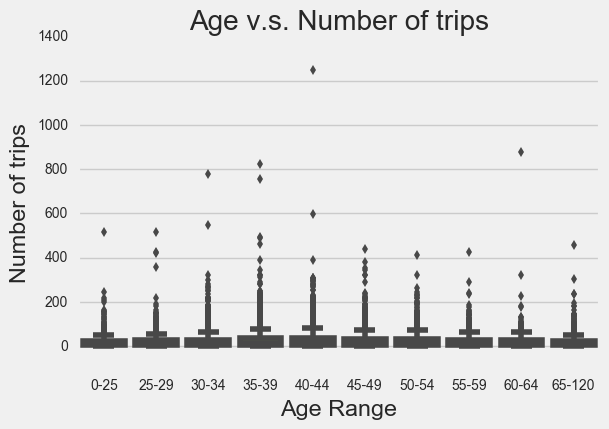

In [46]:
ax = sns.boxplot(x="age_range", y="count", data=age_cnt_df,
                 order = ['0-25', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-120'])
ax.set(xlabel='Age Range', ylabel='Number of trips', title='Age v.s. Number of trips', ylim=(-100, 1400))


### Your Observations
*In all age range, people shops less than 200 times in general. In particular, people is range of 30-54 shops more frequently than others do.*

#### Question 21

Make a visualization of and interpret the relationship between one of the following pairs:

* Amount spent on a shopping trip and the number of trips
* Amount spent on a shopping trip and the customer's age. 
* Frequency of shopping and the customer's age 

In [47]:
# Amount spent on a shopping trip and the customer's age.
print(list(taFengFull))
age_spent_df = taFengFull.groupby(['transaction_time','customer_id', 'age_range'])['sales_price'].sum().reset_index()
age_spent_df.head()

['transaction_time', 'customer_id', 'age_class', 'residence_area', 'product_subclass', 'product_id', 'amount', 'asset', 'sales_price', 'code_age', 'age_range', 'age_min', 'age_max', 'age_center', 'code_residence', 'area', 'dist_rank', 'day_of_week']


,transaction_time,customer_id,age_range,sales_price
0,2000-11-01,38317,65-120,76
1,2000-11-01,45902,55-59,555
2,2000-11-01,45957,50-54,133
3,2000-11-01,46855,35-39,185
4,2000-11-01,58698,35-39,306


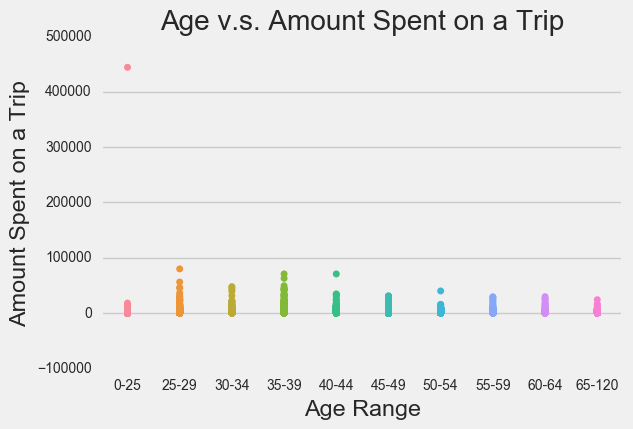

In [57]:
ax = sns.stripplot(x="age_range", y="sales_price", data=age_spent_df,
                  order = ['0-25', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-120'])
ax.set(xlabel='Age Range', ylabel='Amount Spent on a Trip', title='Age v.s. Amount Spent on a Trip')

### Your Observations
*In general people in range of 25-44 spend more than others do. There are some outliers in this range too. The amount spent by people in range of 55~65+ is more consistent.*

# Submitting your assignment
First, run the next cell to run all the tests at once.

In [58]:
_ = ok.grade_all()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

Then, we'll submit the assignment to OkPy so that the staff will know to grade it. You can submit as many times as you want, and you can choose which submission you want us to grade by going to https://okpy.org/cal/data100/sp17/.  After you've done that, make sure you've pushed your changes to Github as well!

In [ ]:
# Now, we'll submit to okpy
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>